In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [46]:
dataGen=ImageDataGenerator(rescale=1)

In [47]:
input_dir= 'D:\\major project\\Practice\\Dats Set'
output_dir= 'D:\major project\Practice\Split Data'

In [48]:
pip install split-folders

In [49]:
import splitfolders

In [50]:
splitfolders.fixed(input=input_dir,output=output_dir,fixed=(395, 100,100),group_prefix=None)

Copying files: 1190 files [00:01, 671.12 files/s]


In [51]:
train_dir = 'D:\\major project\\Practice\\Split Data\\train'
test_dir = 'D:\\major project\\Practice\\Split Data\\test'
val_dir = 'D:\\major project\\Practice\\Split Data\\val'

In [52]:
train_itt=dataGen.flow_from_directory(train_dir, target_size=(124,124),batch_size=32)
test_itt=dataGen.flow_from_directory(test_dir, target_size=(124, 124),batch_size=32)
val_itt=dataGen.flow_from_directory(val_dir, target_size=(124, 124),batch_size=32)

Found 790 images belonging to 2 classes.
Found 210 images belonging to 2 classes.
Found 210 images belonging to 2 classes.


In [53]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [54]:
model= Sequential()


In [55]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(124,124,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))

model.add(Dense(2,activation='sigmoid'))

In [56]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
model.fit(train_itt,validation_data=val_itt,epochs=10)

Epoch 1/10
25/25 [==============================] - 10s 383ms/step - loss: 39.0305 - accuracy: 0.5962 - val_loss: 0.5258 - val_accuracy: 0.6857
Epoch 2/10
25/25 [==============================] - 8s 309ms/step - loss: 0.4218 - accuracy: 0.8456 - val_loss: 0.2792 - val_accuracy: 0.9000
Epoch 3/10
25/25 [==============================] - 8s 309ms/step - loss: 0.2576 - accuracy: 0.9038 - val_loss: 0.2154 - val_accuracy: 0.9190
Epoch 4/10
25/25 [==============================] - 8s 310ms/step - loss: 0.2338 - accuracy: 0.9076 - val_loss: 0.2171 - val_accuracy: 0.9190
Epoch 5/10
25/25 [==============================] - 8s 310ms/step - loss: 0.2487 - accuracy: 0.9114 - val_loss: 0.2241 - val_accuracy: 0.9238
Epoch 6/10
25/25 [==============================] - 8s 312ms/step - loss: 0.2260 - accuracy: 0.9215 - val_loss: 0.2318 - val_accuracy: 0.9143
Epoch 7/10
25/25 [==============================] - 8s 312ms/step - loss: 0.1869 - accuracy: 0.9380 - val_loss: 0.1678 - val_accuracy: 0.9190
Epoc

In [58]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

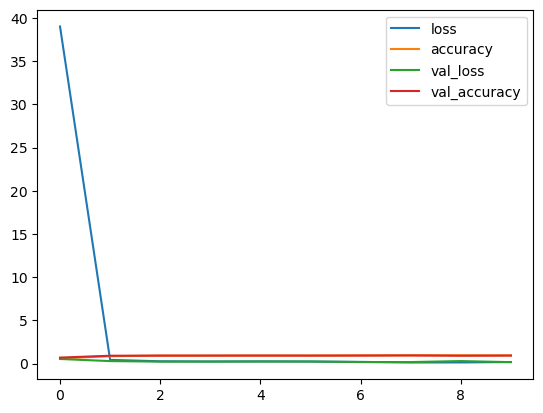

In [59]:
losses.plot()

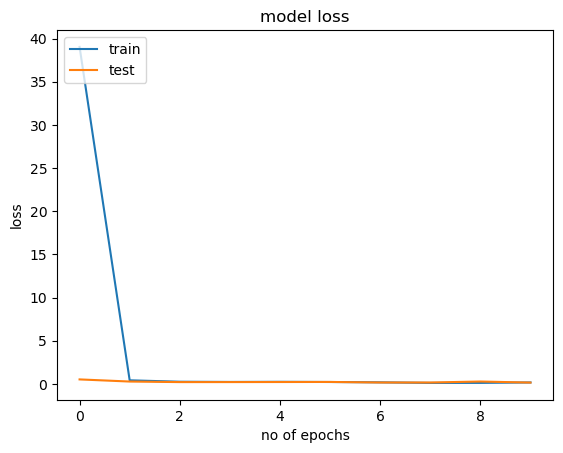

In [60]:
plt.plot(losses['loss'])
plt.plot(losses['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

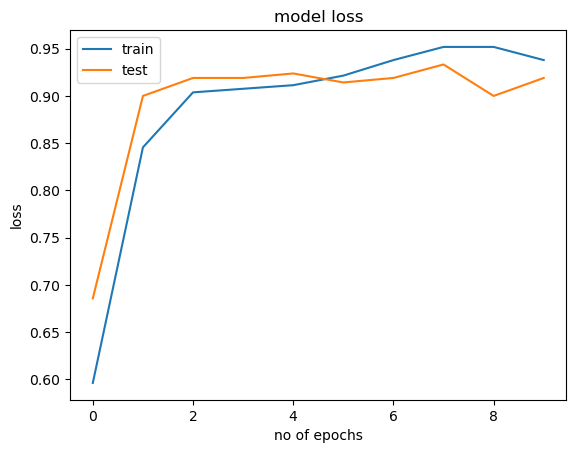

In [61]:
plt.plot(losses['accuracy'])
plt.plot(losses['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [66]:
model.save('smiling or not.h5')

In [67]:
class_label= test_itt.class_indices
class_label

{'non_smile': 0, 'smile': 1}